# Assignment: Working with Data

largest population density>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [3]:
facts['Pop_den'] = facts.apply(lambda x: x['Pop_2020']/x['Area_land'], axis=1) #axis=1 each row, axis=0 each column
facts[['State','Pop_den','Pop_2020','Area_land']].sort_values(by='Pop_den',ascending=False).head(5)

,State,Pop_den,Pop_2020,Area_land
9,District of Columbia,4364.208861,689545.0,158
32,New Jersey,487.688035,9288994.0,19047
43,Rhode Island,409.775579,1097379.0,2678
42,Puerto Rico,370.531574,3285874.0,8868
23,Massachusetts,347.981239,7029917.0,20202


In [4]:
facts['More_water'] = facts.apply(lambda x: x['Area_water'] > x['Area_land'], axis = 1)
facts[['State','More_water','Area_water','Area_land']][facts['More_water']]

,State,More_water,Area_water,Area_land
2,American Samoa,True,1307,198
12,Guam,True,935,543
37,Northern Mariana Islands,True,4644,472
48,United States Virgin Islands,True,1550,348


In [5]:
facts['Pop_increase'] = facts.apply(lambda x: x['Pop_2020'] - x['Pop_2010'], axis = 1)
facts[['State','Pop_increase','Pop_2020','Pop_2010']].sort_values(by='Pop_increase',ascending=False).head(1)

,State,Pop_increase,Pop_2020,Pop_2010
47,Texas,3999944.0,29145505.0,25145561


In [6]:
facts['State_bird'][facts['Pop_2020'] == facts['Pop_2020'].max()]

5    California quail 
Name: State_bird, dtype: object

In [7]:
facts['State_bird'][facts['Area_land'] == facts['Area_land'].max()]

1    Willow ptarmigan 
Name: State_bird, dtype: object

In [8]:
facts['State'][facts['Capital_pop'] == facts['city_1_pop']].count()

21

In [9]:
facts['Perc_drop'] = facts.apply(lambda x: 100 * (x['city_1_pop'] - x['city_5_pop']) / x['city_1_pop'], axis = 1) #100*(1st largest - 5th largest)/(1st largest)
facts['City_1'][facts['Perc_drop'] == facts['Perc_drop'].max()]

34    New York City 
Name: City_1, dtype: object

>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [10]:
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates['Date_Fixed'] = pd.to_datetime(dates['Date'],errors='raise')
merged = pd.merge(facts, dates, left_on='USPS_code',right_on='Abbreviation',how='outer').drop(columns=['Name'])
#dates[['Date','Date_Fixed']]
#merged

In [11]:
colony = merged[merged['Date_Fixed'] < pd.datetime(1790,1,1)]

common_flower = colony['State_flower'].value_counts()[:1]
common_flower

/tmp/ipykernel_1377284/1774539991.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  colony = merged[merged['Date_Fixed'] < pd.datetime(1790,1,1)]


Mountain laurel    2
Name: State_flower, dtype: int64

In [12]:
most_dense_t_pop_den = facts['Pop_den'][merged['Status'] == 'Territory'].max()

least_dense_s_pop_den = facts['Pop_den'][merged['Status'] != 'Territory'].min()

if (most_dense_t_pop_den > least_dense_s_pop_den): print('The most dense US Territory has the larger population density.')
else: print('The least dense state has the larger population density.')

The most dense US Territory has the larger population density.


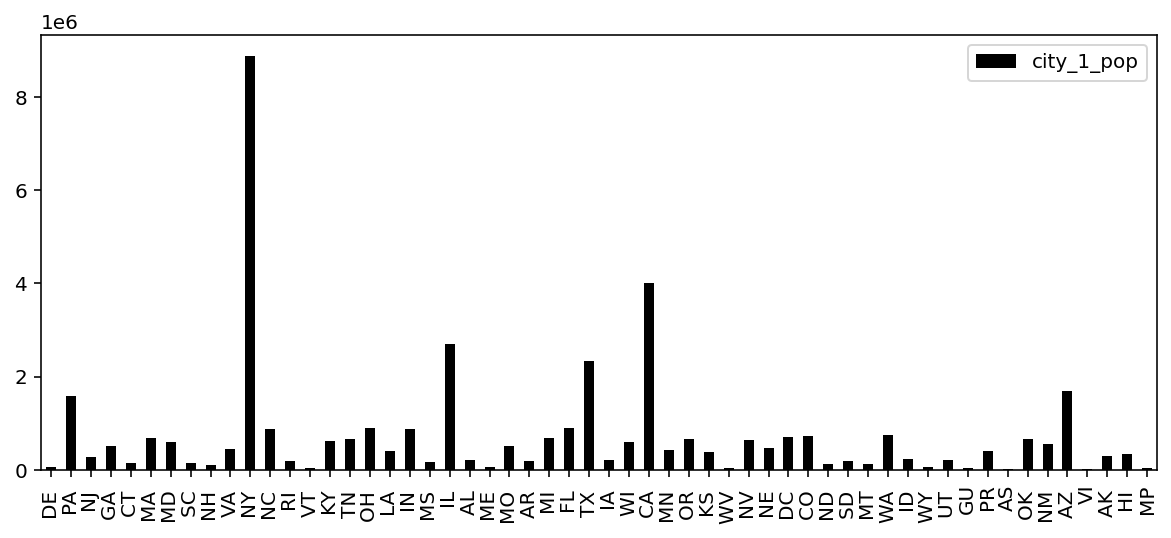

In [13]:
import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

plot = merged.sort_values(by='Date_Fixed',ascending=True)[['city_1_pop','Abbreviation']].plot(kind='bar',figsize=(10,4), color = 'k')
plot.set_xticklabels(merged.sort_values(by='Date_Fixed',ascending=True)['Abbreviation']);

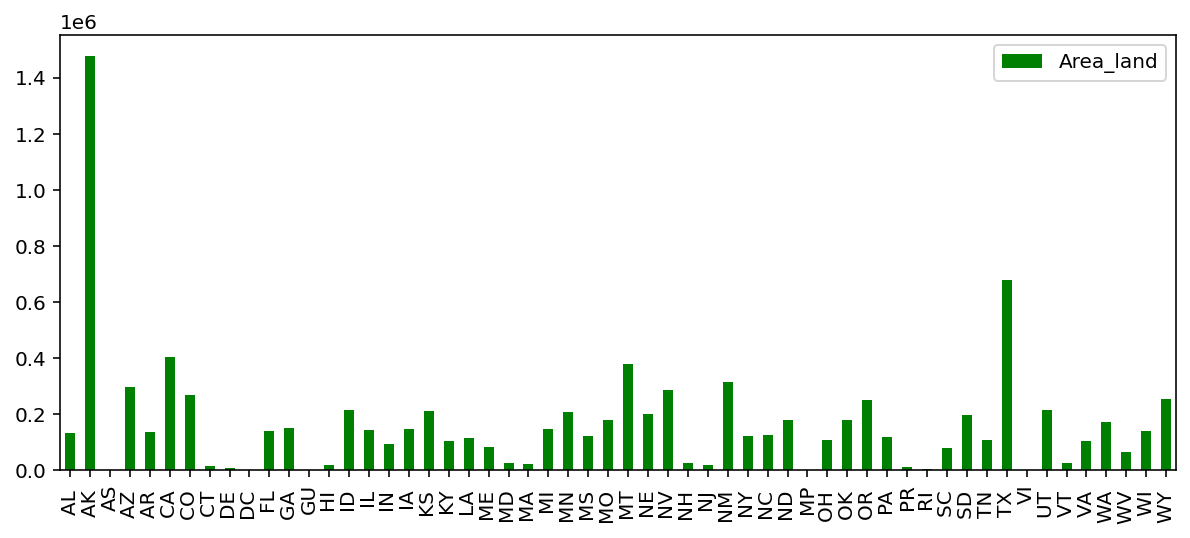

In [14]:
plot = merged[['Area_land','Abbreviation']].plot(kind='bar',figsize=(10,4), color = 'green')
plot.set_xticklabels(merged['Abbreviation']);

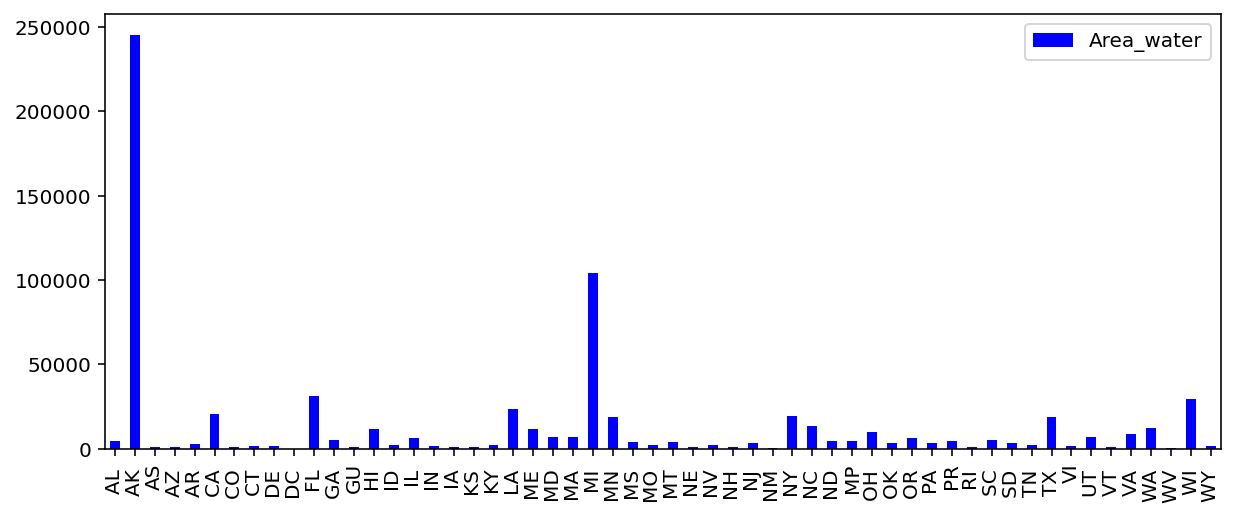

In [15]:
plot = merged[['Area_water','Abbreviation']].plot(kind='bar',figsize=(10,4), color = 'blue')
plot.set_xticklabels(merged['Abbreviation']);